In [120]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import binarize


import sys
import os

sys.path.append(os.path.abspath('../resources'))
import data_preprocessing as dp
import split_normalization as sn

file_dir = os.path.abspath('')

face_cov_filepath = os.path.join(file_dir,"..","data","face_covering.csv")
demographics_filepath = os.path.join(file_dir,"..","data","demographics_2021.csv")

In [121]:

# Loading data
demographics = dp.load_demographics(demographics_filepath)
face_covering = dp.load_referendum(face_cov_filepath)

# Merging data
merged_data = dp.merge_demographics_referendum(demographics, face_covering)
print("Columns in cleaned dataset: \n", merged_data.columns)

# 'names' can be edited to select a different set of columns
names = ['population_density', 'foreigner_percentage', \
    'age_percentage_between_20_64', 'agriculture_surface_perc', \
    'participation_rate', 'yes_perc']
df_filtered = merged_data.filter(names, axis=1)
df_filtered = df_filtered.dropna()

# Filtering data
X = df_filtered.iloc[:, :-1].values
y = df_filtered.iloc[:, len(names)-1].values

# Converting continuous values to binary
# Assuming that a referendum is passed when yes_perc >= 51
y = np.array([1 if x > 50 else 0 for x in y])


# Splitting data into train, development and test
X_train, X_test, X_dev, y_train, y_test, y_dev = sn.split(X, y)


Columns in cleaned dataset: 
 Index(['id', 'municipality_dem', 'population', 'population_variation',
       'population_density', 'foreigner_percentage', 'age_percentage_less_20',
       'age_percentage_between_20_64', 'age_percentage_more_64',
       'marriage_rate', 'divorce_rate', 'birth_rate', 'death_rate',
       'private_households', 'avg_household_size', 'total_surface',
       'housing_and_infrastructure_surface',
       'housing_and_infrastructure_surface_variation',
       'agriculture_surface_perc', 'agriculture_variation_surface_perc',
       'forest_surface_perc', 'unproductive_surface_perc', 'employment_total',
       'employment_primary', 'employment_secondary', 'employment_tertiary',
       'establishments_total', 'establishments_primary',
       'establishments_secondary', 'establishments_tertiary',
       'empty_housing_units', 'new_housing_units_per_capita',
       'social_aid_perc', 'PLR', 'PDC', 'PS', 'UDC', 'PEV_PCS', 'PVL', 'PBD',
       'PST_Sol', 'PES', 'small_

### KNN Analysis


Development data: 

Confusion matrix: 
 [[  8  27]
 [ 11 171]]
Classification report: 
               precision    recall  f1-score   support

           0       0.42      0.23      0.30        35
           1       0.86      0.94      0.90       182

    accuracy                           0.82       217
   macro avg       0.64      0.58      0.60       217
weighted avg       0.79      0.82      0.80       217

Accuracy score: 
 0.8248847926267281


Text(0, 0.5, 'Mean Error')

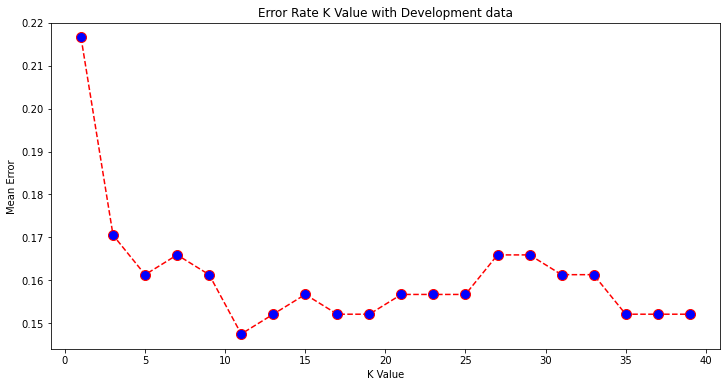

In [122]:

## Development data
print("\nDevelopment data: \n")
# Normalizing data
X_train_reg, X_dev_reg = sn.min_max_scaling(X_train, X_dev)

# Training KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_reg, y_train)

# Testing with development data
y_dev_pred = classifier.predict(X_dev_reg)
print("Confusion matrix: \n", confusion_matrix(y_dev, y_dev_pred))
print("Classification report: \n",classification_report(y_dev, y_dev_pred))
print("Accuracy score: \n",accuracy_score(y_dev, y_dev_pred))

error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i_dev = knn.predict(X_dev)
    error.append(np.mean(pred_i_dev != y_dev))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40, 2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value with Development data')
plt.xlabel('K Value')
plt.ylabel('Mean Error')



Test data: 

Confusion matrix: 
 [[  6  20]
 [  8 183]]
Classification report: 
               precision    recall  f1-score   support

           0       0.43      0.23      0.30        26
           1       0.90      0.96      0.93       191

    accuracy                           0.87       217
   macro avg       0.67      0.59      0.61       217
weighted avg       0.84      0.87      0.85       217

Accuracy score: 
 0.8709677419354839


Text(0, 0.5, 'Mean Error')

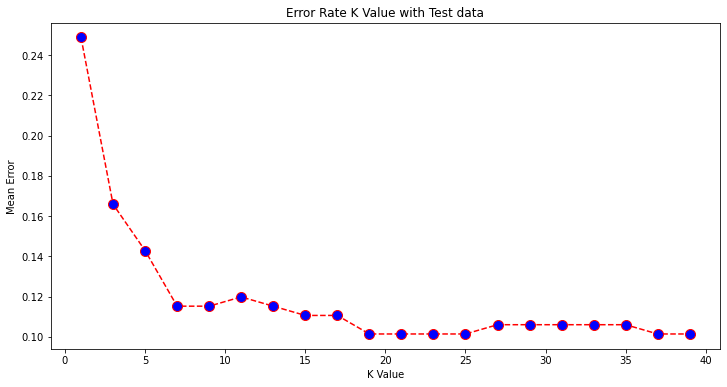

In [123]:
## Test data
print("\nTest data: \n")
# Normalizing data
X_train_reg, X_test_reg = sn.min_max_scaling(X_train, X_test)

# Training KNN Classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_reg, y_train)

# Testing with test data
y_test_pred = classifier.predict(X_test_reg)
print("Confusion matrix: \n", confusion_matrix(y_test, y_test_pred))
print("Classification report: \n",classification_report(y_test, y_test_pred))
print("Accuracy score: \n",accuracy_score(y_test, y_test_pred))

error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i_test = knn.predict(X_test)
    error.append(np.mean(pred_i_test != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40, 2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value with Test data')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import export_text
from IPython.display import display

In [125]:
# Training Decision tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [126]:
## Development data
print("\nDevelopment data: \n")
# Testing with development data
y_dev_pred = clf_model.predict(X_dev)
print("Confusion matrix: \n", confusion_matrix(y_dev, y_dev_pred))
print("Classification report: \n",classification_report(y_dev, y_dev_pred))
print("Accuracy score: \n",accuracy_score(y_dev, y_dev_pred))

# Plotting the Decision tree
target = ["0", "1"]
feature_names = names[:-1]

# Graphical model
# dot_data = tree.export_graphviz(clf_model,
#                                 out_file=None,
#                       feature_names=feature_names,
#                       class_names=target,
#                       filled=True, rounded=True,
#                       special_characters=True)
# graph = graphviz.Source(dot_data)
# display(graph)

# Textual model
r = export_text(clf_model, feature_names=feature_names)
print(r)


Development data: 

Confusion matrix: 
 [[  8  27]
 [  5 177]]
Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.23      0.33        35
           1       0.87      0.97      0.92       182

    accuracy                           0.85       217
   macro avg       0.74      0.60      0.63       217
weighted avg       0.83      0.85      0.82       217

Accuracy score: 
 0.8525345622119815
|--- population_density <= 721.50
|   |--- participation_rate <= 55.55
|   |   |--- agriculture_surface_perc <= 32.85
|   |   |   |--- class: 1
|   |   |--- agriculture_surface_perc >  32.85
|   |   |   |--- class: 1
|   |--- participation_rate >  55.55
|   |   |--- population_density <= 241.00
|   |   |   |--- class: 1
|   |   |--- population_density >  241.00
|   |   |   |--- class: 1
|--- population_density >  721.50
|   |--- participation_rate <= 50.45
|   |   |--- population_density <= 2606.50
|   |   |   |--- class: 1
|   |   |--- popu

In [127]:

## Test data
# Testing with test data
print("\nTest data: \n")
y_test_pred = clf_model.predict(X_test)
print("Confusion matrix: \n", confusion_matrix(y_test, y_test_pred))
print("Classification report: \n",classification_report(y_test, y_test_pred))
print("Accuracy score: \n",accuracy_score(y_test, y_test_pred))

# Plotting the Decision tree
target = [0, 1]
feature_names = names[:-1]

# Graphical model
# dot_data = tree.export_graphviz(clf_model,
#                                 out_file=None,
#                       feature_names=feature_names,
#                       class_names=target,
#                       filled=True, rounded=True,
#                       special_characters=True)
# graph = graphviz.Source(dot_data)
# print(graph)

# Textual model
print("Textual model: \n")
r = export_text(clf_model, feature_names=feature_names)
print(r)


Test data: 

Confusion matrix: 
 [[  7  19]
 [  8 183]]
Classification report: 
               precision    recall  f1-score   support

           0       0.47      0.27      0.34        26
           1       0.91      0.96      0.93       191

    accuracy                           0.88       217
   macro avg       0.69      0.61      0.64       217
weighted avg       0.85      0.88      0.86       217

Accuracy score: 
 0.8755760368663594
Textual model: 

|--- population_density <= 721.50
|   |--- participation_rate <= 55.55
|   |   |--- agriculture_surface_perc <= 32.85
|   |   |   |--- class: 1
|   |   |--- agriculture_surface_perc >  32.85
|   |   |   |--- class: 1
|   |--- participation_rate >  55.55
|   |   |--- population_density <= 241.00
|   |   |   |--- class: 1
|   |   |--- population_density >  241.00
|   |   |   |--- class: 1
|--- population_density >  721.50
|   |--- participation_rate <= 50.45
|   |   |--- population_density <= 2606.50
|   |   |   |--- class: 1
|   |  

### Logistic regression

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [129]:
## Logistic regression
logreg = LogisticRegression()
# Instantiate the  model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()


Development data: 

Confusion matrix: 
 [[  4  31]
 [  3 179]]
Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.11      0.19        35
           1       0.85      0.98      0.91       182

    accuracy                           0.84       217
   macro avg       0.71      0.55      0.55       217
weighted avg       0.81      0.84      0.80       217

Accuracy score: 
 0.8433179723502304


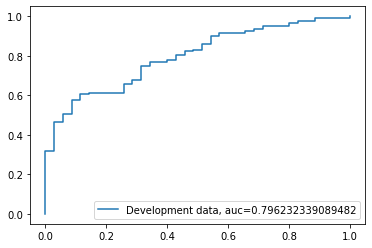

In [130]:

## Development data
print("\nDevelopment data: \n")
# Testing with development data
y_dev_pred = logreg.predict(X_dev)
print("Confusion matrix: \n", confusion_matrix(y_dev, y_dev_pred))
print("Classification report: \n",classification_report(y_dev, y_dev_pred))
print("Accuracy score: \n",accuracy_score(y_dev, y_dev_pred))

y_dev_pred_proba = logreg.predict_proba(X_dev)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_dev,  y_dev_pred_proba)
auc = metrics.roc_auc_score(y_dev,  y_dev_pred_proba)
plt.plot(fpr,tpr,label="Development data, auc="+str(auc))
plt.legend(loc=4)
plt.show()


Test data: 

Confusion matrix: 
 [[  3  23]
 [  2 189]]
Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.12      0.19        26
           1       0.89      0.99      0.94       191

    accuracy                           0.88       217
   macro avg       0.75      0.55      0.57       217
weighted avg       0.86      0.88      0.85       217

Accuracy score: 
 0.8847926267281107


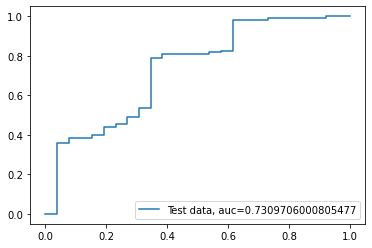

In [131]:

## Test data
print("\nTest data: \n")
# Testing with development data
y_test_pred = logreg.predict(X_test)
print("Confusion matrix: \n", confusion_matrix(y_test, y_test_pred))
print("Classification report: \n",classification_report(y_test, y_test_pred))
print("Accuracy score: \n",accuracy_score(y_test, y_test_pred))

y_test_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_proba)
auc = metrics.roc_auc_score(y_test,  y_test_pred_proba)
plt.plot(fpr,tpr,label="Test data, auc="+str(auc))
plt.legend(loc=4)
plt.show()